In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import time
import seaborn as sns
import numpy as np

In [26]:
start = time.time()
df = pd.read_csv('combined_file.csv')
end = time.time()
print("Loading took " + str(round(end - start, 2)) + " seconds")

Loading took 0.05 seconds


In [27]:
df.head(5)

,Time,System Production (W)
0,10/01/2020 00:00,0.0
1,10/01/2020 00:15,0.0
2,10/01/2020 00:30,0.0
3,10/01/2020 00:45,0.0
4,10/01/2020 01:00,0.0


In [28]:
df['Time'] = pd.to_datetime(df['Time'])


In [29]:
df['minute'] = df['Time'].dt.minute
df['Hour'] = df['Time'].dt.hour
df['Month'] = df['Time'].dt.month
df['Day'] = df['Time'].dt.day
df['Year'] = df['Time'].dt.year
df = df.drop(["Time"], axis = 1)

In [30]:
df

,System Production (W),minute,Hour,Month,Day,Year
0,0.0,0,0,10,1,2020
1,0.0,15,0,10,1,2020
2,0.0,30,0,10,1,2020
3,0.0,45,0,10,1,2020
4,0.0,0,1,10,1,2020
...,...,...,...,...,...,...
96283,0.0,45,22,6,30,2023
96284,0.0,0,23,6,30,2023
96285,0.0,15,23,6,30,2023
96286,0.0,30,23,6,30,2023


In [31]:
df["Month"].value_counts()

Month
10    8928
12    8928
1     8928
3     8928
5     8928
11    8640
4     8640
6     8640
2     8064
7     5952
8     5952
9     5760
Name: count, dtype: int64

In [32]:
df.head(5)

,System Production (W),minute,Hour,Month,Day,Year
0,0.0,0,0,10,1,2020
1,0.0,15,0,10,1,2020
2,0.0,30,0,10,1,2020
3,0.0,45,0,10,1,2020
4,0.0,0,1,10,1,2020


C:\Users\Acer\AppData\Local\Temp\ipykernel_4300\1280373078.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Year', y='System Production (W)', data=df, estimator=np.sum, ci=None)


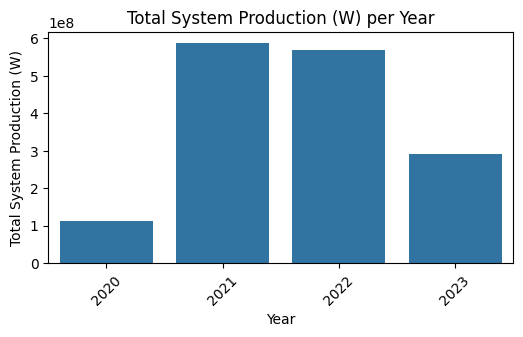

In [33]:
plt.figure(figsize=(6, 3))
sns.barplot(x='Year', y='System Production (W)', data=df, estimator=np.sum, ci=None)
plt.title('Total System Production (W) per Year')
plt.xlabel('Year')
plt.ylabel('Total System Production (W)')
plt.xticks(rotation=45)
plt.show()

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import random

def plot_seasonal_decompose(df, column_name, model='additive', period=None):
    """
    Perform seasonal decomposition on a time series and plot the results.
    Parameters:
    df (DataFrame): The input DataFrame containing the time series data.
    column_name (str): The name of the column in the DataFrame to decompose.
    model (str): The type of decomposition ('additive' or 'multiplicative'). Default is 'additive'.
    period (int): The number of observations per cycle. If None, it will be inferred.
    Returns:
    None
    """
    # Perform seasonal decomposition
    result = seasonal_decompose(df[column_name], model=model, period=period)
    trend = result.trend.dropna()
    seasonal = result.seasonal.dropna()
    residual = result.resid.dropna()

    # Generate random colors for each plot
    base_color = [random.random() for _ in range(3)]  # Generate a random RGB color

    # Plotting the decomposition with random colors
    plt.figure(figsize=(10, 10))
    plt.suptitle('Seasonal Decomposition of ' + column_name, fontsize=16)
    plt.subplot(4, 1, 1)
    plt.plot(df[column_name], color=base_color, label='Original Series')
    plt.legend(loc='upper left')
    
    plt.subplot(4, 1, 2)
    plt.plot(trend, color=base_color, label='Trend')
    plt.legend(loc='upper left')

    plt.subplot(4, 1, 3)
    plt.plot(seasonal, color=base_color, label='Seasonal')
    plt.legend(loc='upper left')

    plt.subplot(4, 1, 4)
    plt.plot(residual, color=base_color, label='Residuals')
    plt.legend(loc='upper left')

    plt.tight_layout()
    plt.show()


In [35]:
# Split the data by year
df_by_year = {year: data for year, data in df.groupby('Year')}

# Example: Access data for a specific year
df_2020 = df_by_year[2020]
df_2021 = df_by_year[2021]
df_2022 = df_by_year[2022]
df_2023 = df_by_year[2023]

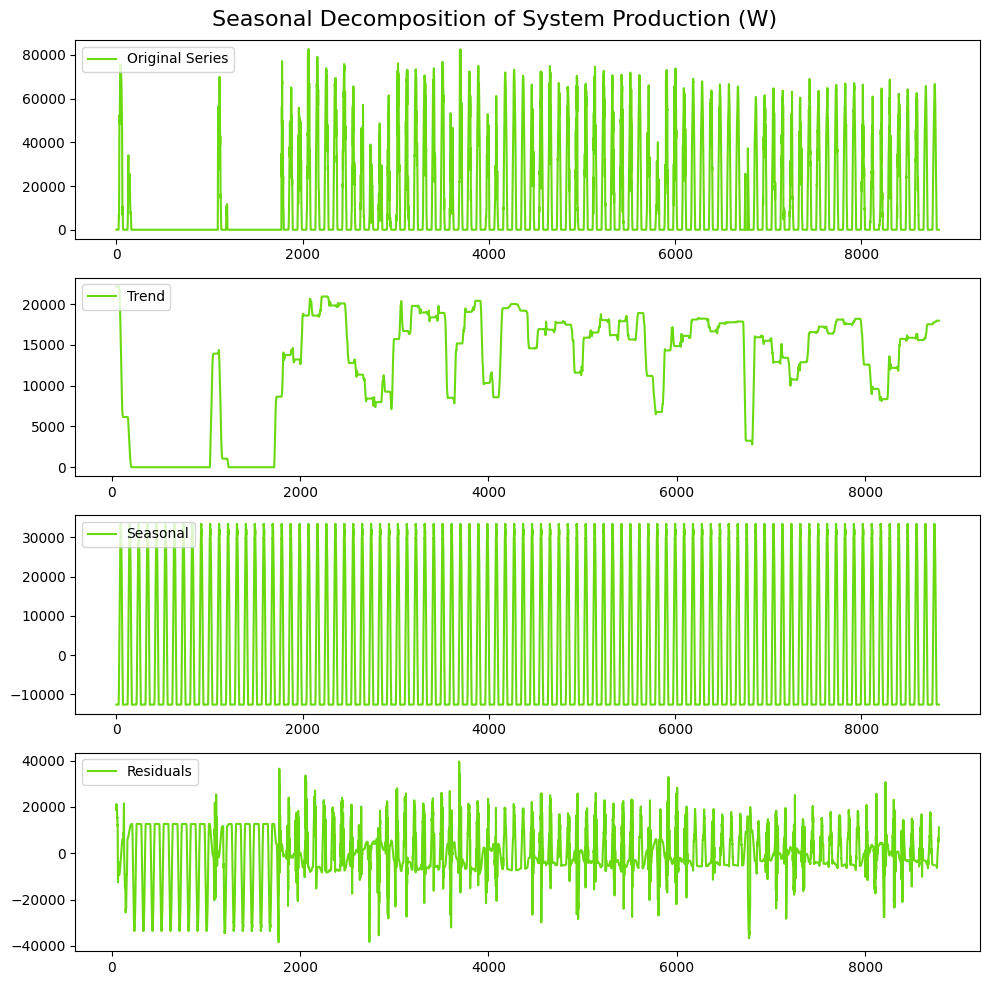

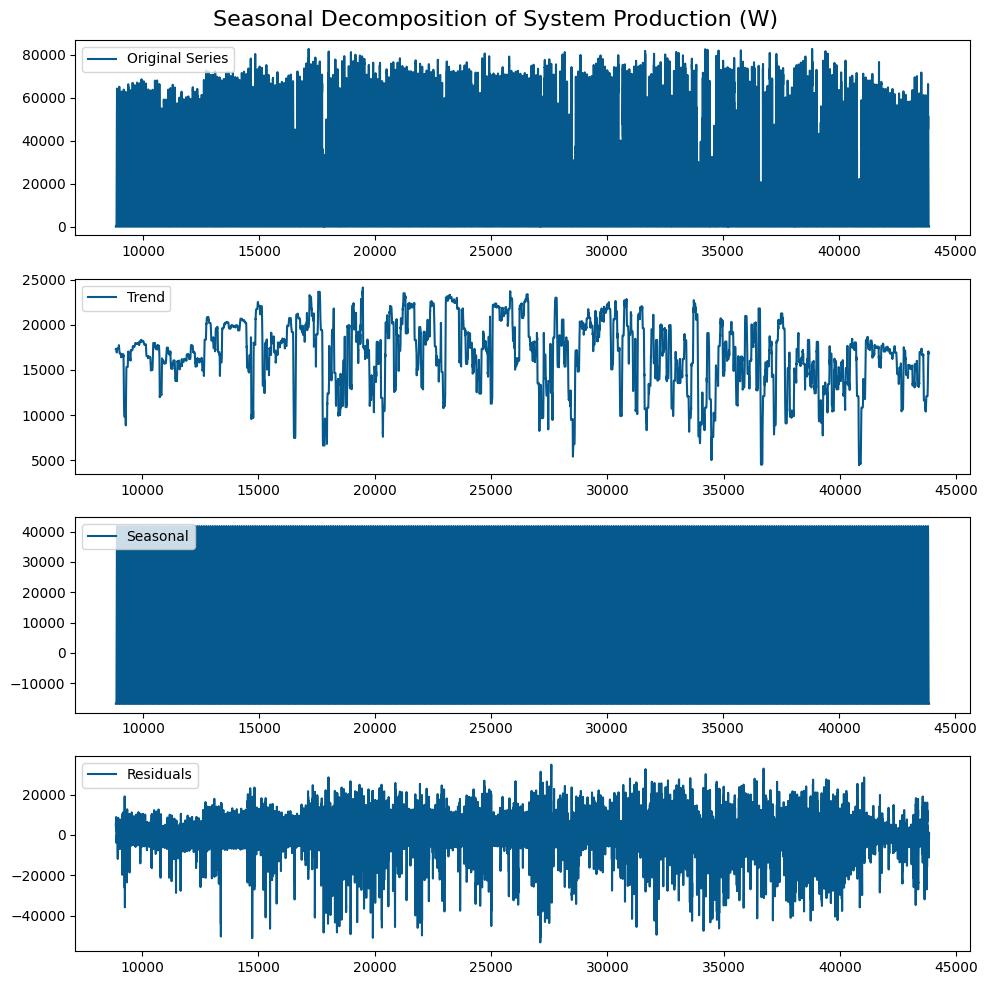

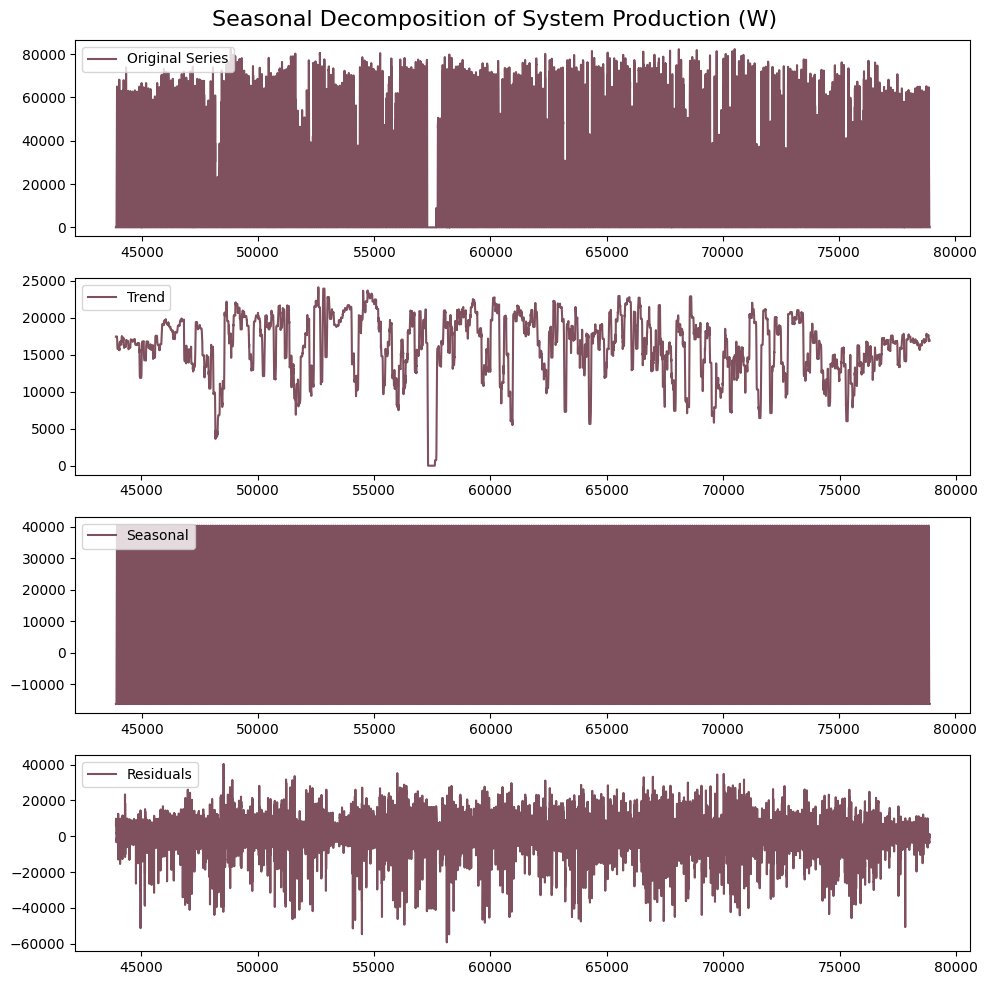

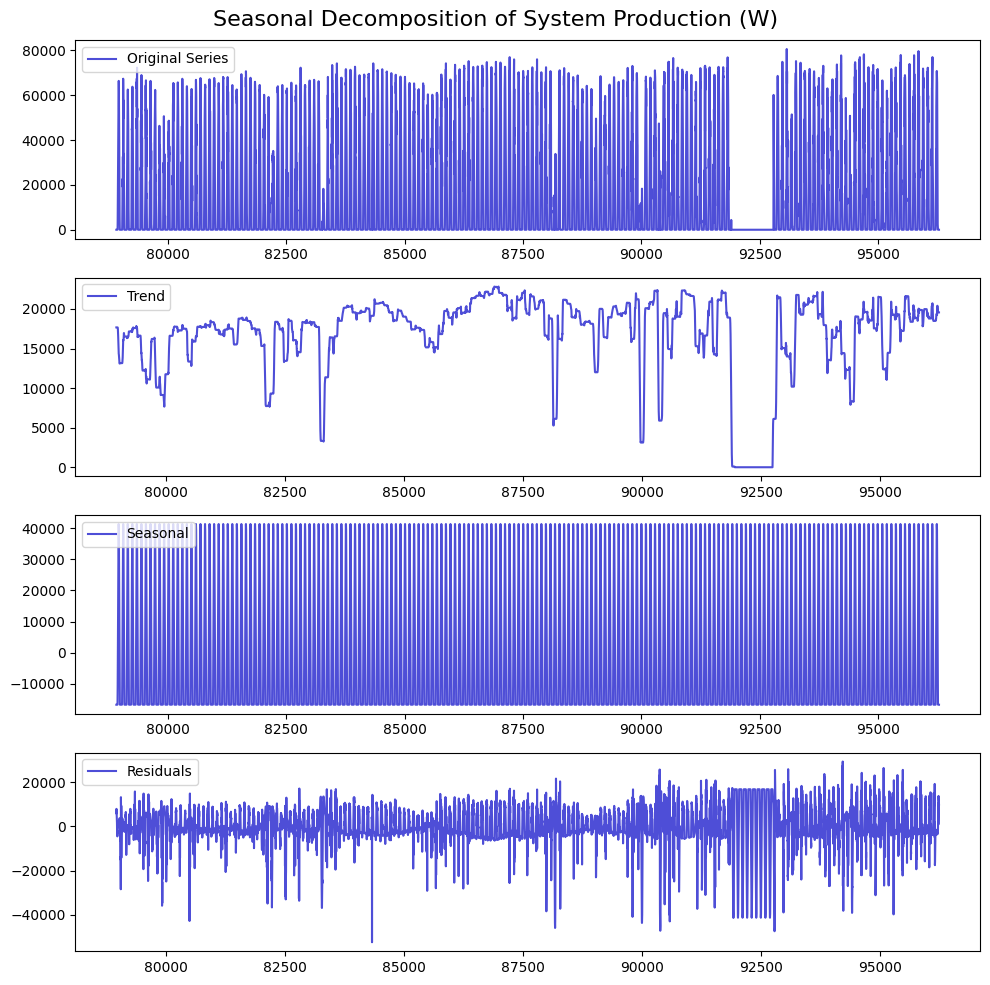

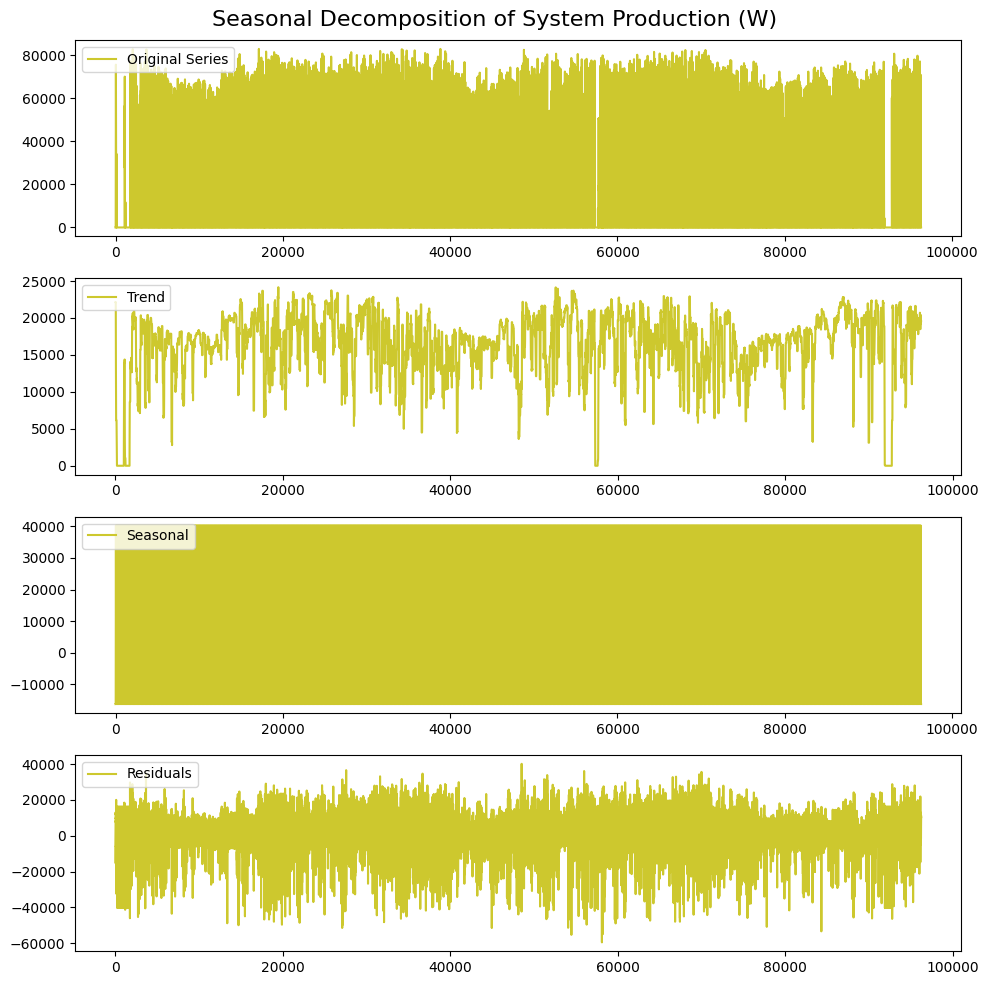

In [36]:
plot_seasonal_decompose(df=df_2020, column_name='System Production (W)', model='additive', period=96)
plot_seasonal_decompose(df=df_2021, column_name='System Production (W)', model='additive', period=96)
plot_seasonal_decompose(df=df_2022, column_name='System Production (W)', model='additive', period=96)
plot_seasonal_decompose(df=df_2023, column_name='System Production (W)', model='additive', period=96)
plot_seasonal_decompose(df=df, column_name='System Production (W)', model='additive', period=96)

In [40]:
from prophet import Prophet

# Prepare the data for Prophet
df_prophet = df_2023[['Year', 'Month', 'Day', 'Hour', 'minute', 'System Production (W)']].copy()
df_prophet['ds'] = pd.to_datetime(df_prophet[['Year', 'Month', 'Day', 'Hour', 'minute']])
df_prophet.rename(columns={'System Production (W)': 'y'}, inplace=True)
df_prophet = df_prophet[['ds', 'y']]

In [41]:
df_prophet

,ds,y
78912,2023-01-01 00:00:00,0.0
78913,2023-01-01 00:15:00,0.0
78914,2023-01-01 00:30:00,0.0
78915,2023-01-01 00:45:00,0.0
78916,2023-01-01 01:00:00,0.0
...,...,...
96283,2023-06-30 22:45:00,0.0
96284,2023-06-30 23:00:00,0.0
96285,2023-06-30 23:15:00,0.0
96286,2023-06-30 23:30:00,0.0


In [42]:
# Train the Prophet model
model = Prophet()
model.fit(df_prophet)

16:52:54 - cmdstanpy - INFO - Chain [1] start processing
16:53:00 - cmdstanpy - INFO - Chain [1] done processing


In [54]:
Hours = 24
freq = 15
Days = 30
Months = 1

freq = 60/freq
period = Hours * freq * Days * Months

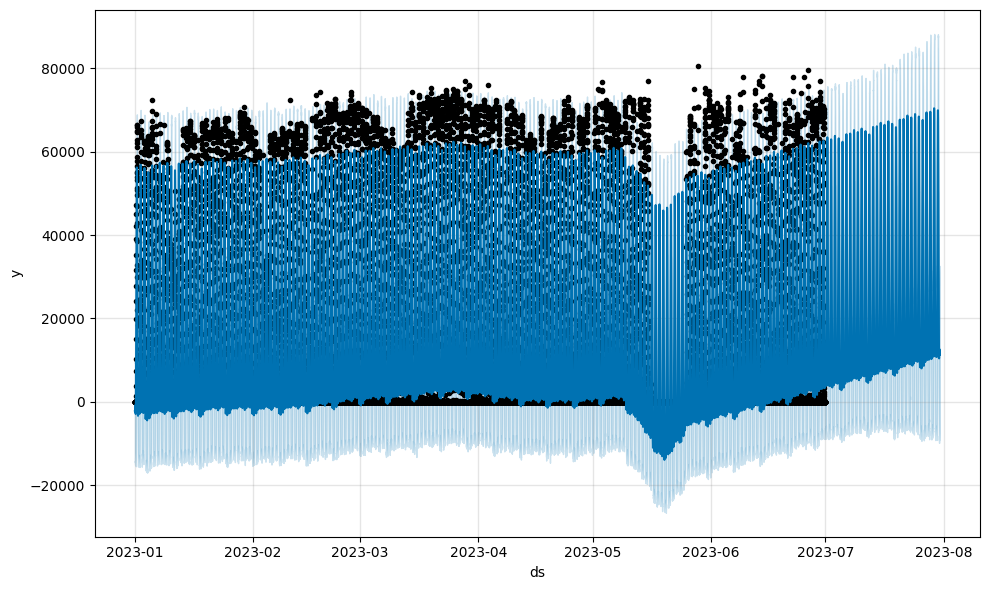

In [53]:
# Make future dataframe
future = model.make_future_dataframe(periods=period, freq='15min')

# Predict
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
plt.show()

In [60]:
Time_Start = '2023-04-20'
Time_End = '2023-06-15'

C:\Users\Acer\AppData\Local\Temp\ipykernel_4300\3394785487.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast_data['yhat'] = forecast_data['yhat'].apply(lambda x: 0 if x < 0 else x)


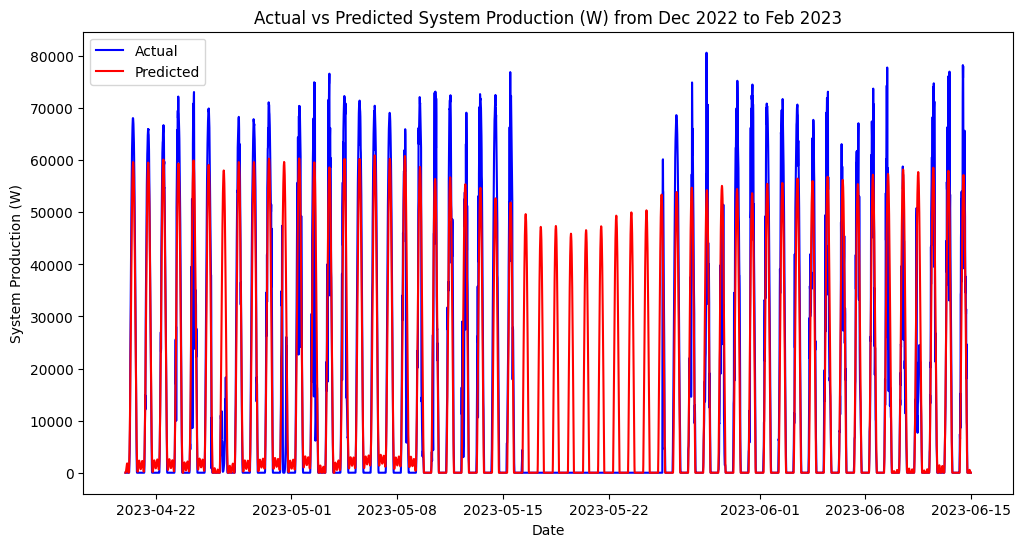

In [61]:
# Create 'ds' column in actual_data
actual_data = df[['Year', 'Month', 'Day', 'Hour', 'minute', 'System Production (W)']].copy()
actual_data['ds'] = pd.to_datetime(actual_data[['Year', 'Month', 'Day', 'Hour', 'minute']])

# Filter actual data for the specified date range
actual_data = actual_data[(actual_data['ds'] >= Time_Start) & (actual_data['ds'] <= Time_End)]

# Filter forecast data for the same date range
forecast_data = forecast[(forecast['ds'] >= Time_Start) & (forecast['ds'] <= Time_End)]
forecast_data['yhat'] = forecast_data['yhat'].apply(lambda x: 0 if x < 0 else x)
# Plot actual vs predicted data
plt.figure(figsize=(12, 6))
plt.plot(actual_data['ds'], actual_data['System Production (W)'], label='Actual', color='blue')
plt.plot(forecast_data['ds'], forecast_data['yhat'], label='Predicted', color='red')
plt.title('Actual vs Predicted System Production (W) from Dec 2022 to Feb 2023')
plt.xlabel('Date')
plt.ylabel('System Production (W)')
plt.legend()
plt.show()